In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [2]:
df = pd.read_csv("reger.csv")
df.head()
#df.info() 

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Dollar
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [3]:
df = df.dropna(subset=["Address"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3456 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       3456 non-null   object 
 1   Room       3456 non-null   int64  
 2   Parking    3456 non-null   bool   
 3   Warehouse  3456 non-null   bool   
 4   Elevator   3456 non-null   bool   
 5   Address    3456 non-null   object 
 6   Price      3456 non-null   float64
 7   Dollar     3456 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 145.1+ KB


In [4]:
df["Parking"] = df["Parking"]*1
df["Warehouse"] = df["Warehouse"]*1
df["Elevator"] = df["Elevator"]*1
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3456 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       3456 non-null   object 
 1   Room       3456 non-null   int64  
 2   Parking    3456 non-null   int32  
 3   Warehouse  3456 non-null   int32  
 4   Elevator   3456 non-null   int32  
 5   Address    3456 non-null   object 
 6   Price      3456 non-null   float64
 7   Dollar     3456 non-null   float64
dtypes: float64(2), int32(3), int64(1), object(2)
memory usage: 175.5+ KB


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Dollar
0,63,1,1,1,1,Shahran,1.850000e+09,61666.67
1,60,1,1,1,1,Shahran,1.850000e+09,61666.67
2,79,2,1,1,1,Pardis,5.500000e+08,18333.33
3,95,2,1,1,1,Shahrake Qods,9.025000e+08,30083.33
4,123,2,1,1,1,Shahrake Gharb,7.000000e+09,233333.33


In [5]:
df["Area"] = pd.to_numeric(df["Area"],errors="coerce")
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3456 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       3450 non-null   float64
 1   Room       3456 non-null   int64  
 2   Parking    3456 non-null   int32  
 3   Warehouse  3456 non-null   int32  
 4   Elevator   3456 non-null   int32  
 5   Address    3456 non-null   object 
 6   Price      3456 non-null   float64
 7   Dollar     3456 non-null   float64
dtypes: float64(3), int32(3), int64(1), object(1)
memory usage: 189.0+ KB


In [6]:
cdf = df[["Area","Room","Parking","Warehouse","Elevator","Price","Dollar"]]

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy="median")
x = imputer.fit_transform(cdf)
cdf = pd.DataFrame(x,columns=cdf.columns)
cdf.info()
cdf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3456 entries, 0 to 3455
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       3456 non-null   float64
 1   Room       3456 non-null   float64
 2   Parking    3456 non-null   float64
 3   Warehouse  3456 non-null   float64
 4   Elevator   3456 non-null   float64
 5   Price      3456 non-null   float64
 6   Dollar     3456 non-null   float64
dtypes: float64(7)
memory usage: 189.1 KB


,Area,Room,Parking,Warehouse,Elevator,Price,Dollar
0,63.0,1.0,1.0,1.0,1.0,1.850000e+09,61666.67
1,60.0,1.0,1.0,1.0,1.0,1.850000e+09,61666.67
2,79.0,2.0,1.0,1.0,1.0,5.500000e+08,18333.33
3,95.0,2.0,1.0,1.0,1.0,9.025000e+08,30083.33
4,123.0,2.0,1.0,1.0,1.0,7.000000e+09,233333.33


In [7]:
cdf["Area"] = (cdf["Area"] - cdf["Area"].min())/(cdf["Area"].max() - cdf["Area"].min())
cdf.head()
cdf.describe()

,Area,Room,Parking,Warehouse,Elevator,Price,Dollar
count,3456.000000,3456.000000,3456.000000,3456.000000,3456.000000,3.456000e+03,3.456000e+03
mean,0.085526,2.081308,0.847512,0.914931,0.787326,5.379957e+09,1.793319e+05
std,0.077302,0.759723,0.359546,0.279025,0.409258,8.121729e+09,2.707243e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,3.600000e+06,1.200000e+02
25%,0.043382,2.000000,1.000000,1.000000,1.000000,1.420000e+09,4.733333e+04
50%,0.066741,2.000000,1.000000,1.000000,1.000000,2.900000e+09,9.666667e+04
75%,0.100111,2.000000,1.000000,1.000000,1.000000,6.000000e+09,2.000000e+05
max,1.000000,5.000000,1.000000,1.000000,1.000000,9.240000e+10,3.080000e+06


In [8]:
corr_matrix = cdf.corr()
corr_matrix["Price"].sort_values(ascending=False)

Dollar       1.000000
Price        1.000000
Area         0.722187
Room         0.567994
Parking      0.190774
Elevator     0.111330
Warehouse    0.109069
Name: Price, dtype: float64

In [9]:
cdf["p2"] = cdf["Parking"]+0.4
cdf["w2"] = cdf["Warehouse"]+0.2
cdf["e2"] = cdf["Elevator"]+0.3

cdf["a_p"] = cdf["Area"]*cdf["p2"]
cdf["a_w"] = cdf["Area"]*cdf["w2"]
cdf["a_e"] = cdf["Area"]*cdf["e2"]

cdf = cdf.drop(["p2","w2","e2"],axis=1)
cdf


,Area,Room,Parking,Warehouse,Elevator,Price,Dollar,a_p,a_w,a_e
0,0.036707,1.0,1.0,1.0,1.0,1.850000e+09,61666.67,0.051390,0.044049,0.047720
1,0.033370,1.0,1.0,1.0,1.0,1.850000e+09,61666.67,0.046719,0.040044,0.043382
2,0.054505,2.0,1.0,1.0,1.0,5.500000e+08,18333.33,0.076307,0.065406,0.070857
3,0.072303,2.0,1.0,1.0,1.0,9.025000e+08,30083.33,0.101224,0.086763,0.093993
4,0.103448,2.0,1.0,1.0,1.0,7.000000e+09,233333.33,0.144828,0.124138,0.134483
...,...,...,...,...,...,...,...,...,...,...
3451,0.062291,2.0,1.0,1.0,1.0,3.500000e+09,116666.67,0.087208,0.074750,0.080979
3452,0.058954,2.0,1.0,1.0,1.0,6.800000e+09,226666.67,0.082536,0.070745,0.076641
3453,0.050056,2.0,0.0,0.0,0.0,3.650000e+08,12166.67,0.020022,0.010011,0.015017
3454,0.083426,2.0,1.0,1.0,1.0,5.600000e+09,186666.67,0.116796,0.100111,0.108454


In [10]:
corr_matrix = cdf.corr()
corr_matrix["Price"].sort_values(ascending=False)

Dollar       1.000000
Price        1.000000
Area         0.722187
a_w          0.721132
a_p          0.719366
a_e          0.705452
Room         0.567994
Parking      0.190774
Elevator     0.111330
Warehouse    0.109069
Name: Price, dtype: float64

Text(0, 0.5, 'Price')

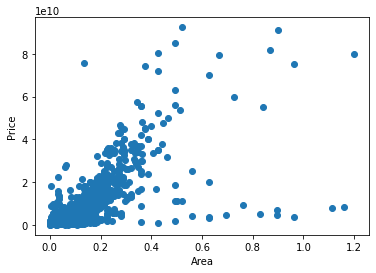

In [11]:
cdf = cdf.sort_values(["Area","Price"],ascending=True)
plt.scatter(cdf.a_w,cdf.Price)
plt.xlabel("Area")
plt.ylabel("Price")

In [12]:
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder(sparse=False)
df_add = df["Address"].copy()
df_str = one_hot.fit_transform(df[["Address"]])
df_str2 = pd.DataFrame(df_str)
df_str2.columns = one_hot.get_feature_names(["add"])
final = pd.concat([cdf,df_str2],axis=1)
final.tail(20)

,Area,Room,Parking,Warehouse,Elevator,Price,Dollar,a_p,a_w,a_e,...,add_Waterfall,add_West Ferdows Boulevard,add_West Pars,add_Yaftabad,add_Yakhchiabad,add_Yousef Abad,add_Zafar,add_Zaferanieh,add_Zargandeh,add_Zibadasht
3436,0.055617,2.0,1.0,1.0,1.0,2.250000e+09,75000.00,0.077864,0.066741,0.072303,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3437,0.031146,1.0,0.0,0.0,1.0,3.250000e+08,10833.33,0.012458,0.006229,0.040489,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3438,0.027809,1.0,1.0,1.0,1.0,2.300000e+09,76666.67,0.038932,0.033370,0.036151,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3439,0.033370,1.0,1.0,1.0,1.0,1.950000e+09,65000.00,0.046719,0.040044,0.043382,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3440,0.114572,3.0,1.0,0.0,1.0,1.000000e+10,333333.33,0.160400,0.022914,0.148943,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3441,0.071190,2.0,0.0,1.0,1.0,5.950000e+08,19833.33,0.028476,0.085428,0.092547,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3442,0.042269,2.0,0.0,1.0,1.0,1.258000e+09,41933.33,0.016908,0.050723,0.054950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3443,0.034483,2.0,0.0,1.0,0.0,4.600000e+08,15333.33,0.013793,0.041379,0.010345,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3444,0.050056,2.0,1.0,1.0,1.0,2.650000e+09,88333.33,0.070078,0.060067,0.065072,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3445,0.056730,2.0,1.0,1.0,1.0,4.455000e+09,148500.00,0.079422,0.068076,0.073749,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
train,test = train_test_split(final,test_size=0.2,random_state=42)
train.head()
#train_lab = train["Price"]
train_lab2 = train["Dollar"]
train = train.drop(["Price","Dollar"],axis=1)

In [58]:
test_lab = test["Price"].copy()
test_lab2 = test["Dollar"].copy()
test = test.drop(["Price","Dollar"],axis=1)

KeyError: 'Price'

In [50]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train,train_lab2)

examplee = train.iloc[4:8]
print("Pridication\t", lin_reg.predict(examplee))

print("--"*50)


exa = train_lab2.iloc[4:8]
print("laval\t\t", list(exa))

Pridication	 [28968. 52892. 66836. 69504.]
----------------------------------------------------------------------------------------------------
laval		 [58333.33, 70000.0, 71666.67, 82000.0]


In [51]:
lin_pred = lin_reg.predict(train)
y = []
for i in lin_pred:
    if i == 0 :
        y.append(i)
    elif i > 0:
        y.append(i)
    else:
        y.append(0)
        
print(y)
    

[227324.0, 23436.0, 0, 185348.0, 28968.0, 52892.0, 66836.0, 69504.0, 0, 53844.0, 738512.0, 88968.0, 246000.0, 72432.0, 431788.0, 68364.0, 137568.0, 57596.0, 47600.0, 87552.0, 2453704.0, 0, 883836.0, 88264.0, 180916.0, 199880.0, 91660.0, 156284.0, 315784.0, 0, 337772.0, 26412.0, 55844.0, 128768.0, 23288.0, 458428.0, 203440.0, 157572.0, 94848.0, 399396.0, 178868.0, 43772.0, 0, 201932.0, 61160.0, 803692.0, 54460.0, 68608.0, 0, 91108.0, 128460.0, 58520.0, 69368.0, 130520.0, 247996.0, 394776.0, 54436.0, 816.0, 8356.0, 198000.0, 147960.0, 33068.0, 52348.0, 106272.0, 82896.0, 985564.0, 106068.0, 64964.0, 41044.0, 113976.0, 224964.0, 28728.0, 144272.0, 32832.0, 93140.0, 3264.0, 248260.0, 49520.0, 476124.0, 84600.0, 1317908.0, 11288.0, 206980.0, 36716.0, 131568.0, 327812.0, 315528.0, 83492.0, 79280.0, 58708.0, 117772.0, 36808.0, 104824.0, 591648.0, 67832.0, 286324.0, 121980.0, 498500.0, 442996.0, 82488.0, 0, 376324.0, 603912.0, 28316.0, 380048.0, 121284.0, 94520.0, 102624.0, 26412.0, 470052.0, 

In [52]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(train_lab2,y)
lin_rmse = np.sqrt(mse)
print("mse:", mse)
print("--"*50)
print("rmse:",lin_rmse)

mse: 15017983574.142168
----------------------------------------------------------------------------------------------------
rmse: 122547.88278114873


In [53]:
from sklearn.metrics import r2_score
r2 = r2_score(train_lab2,y)
r2

0.7833548668699369

In [54]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(train,train_lab2)
tree_predict = tree_reg.predict(train)
tree_nse = mean_squared_error(train_lab2,tree_predict)
tree_rnse = np.sqrt(tree_nse)
r2 = r2_score(train_lab2,tree_predict)
print("mse",tree_nse)
print("tree_rnse",tree_rnse)
print("r2",r2)

mse 458144974.85422987
tree_rnse 21404.321406067276
r2 0.9933909317066334


In [55]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(train,train_lab2)
forest_predict = forest_reg.predict(train)
mse4 = mean_squared_error(train_lab2,forest_predict)
lin_rmse4 = np.sqrt(mse4)
r2 = r2_score(train_lab2,forest_predict)
print("mse:", mse4)
print("--"*50)
print("rmse:",lin_rmse4)
print("r2",r2)

mse: 3457795177.890502
----------------------------------------------------------------------------------------------------
rmse: 58803.02014259558
r2 0.9501188363303049


In [59]:
lin_pred2 = lin_reg.predict(test)
y2 = []
for j in lin_pred2:
    if j ==0:
        y2.append(j)
    elif j > 0 :
        y2.append(j)
    else:
        y2.append(0)

In [60]:
mse2 = mean_squared_error(test_lab2,y2)
lin_rmse2 = np.sqrt(mse2)
r22 = r2_score(test_lab2,y2)
print("mse:", mse2)
print("--"*50)
print("rmse:",lin_rmse2)
print("--"*50)
print("r2",r22)

mse: 34682758195.63349
----------------------------------------------------------------------------------------------------
rmse: 186233.07492396052
----------------------------------------------------------------------------------------------------
r2 0.6102143335925414


In [62]:
from sklearn.model_selection import RandomizedSearchCV
param = {"max_depth":[5,10,15,20,None],"max_features":["auto","sqrt","log2",5,2,15,20,],}
crv = RandomizedSearchCV(tree_reg, param, random_state=0)
sea = crv.fit(train.values,train_lab2.values)
sea.best_params_

{'max_features': 20, 'max_depth': 15}

In [63]:
tree_reg2 = DecisionTreeRegressor(max_depth=15,max_features=20)
tree_reg2.fit(train,train_lab2)

tree_pred2 = tree_reg2.predict(test)
mse3 = mean_squared_error(test_lab2,tree_pred2)
lin_rmse3 = np.sqrt(mse3)
r222 = r2_score(test_lab2,tree_pred2)
print("MSE",mse3)
print("--"*50)
print("rmse",lin_rmse3)
print("--"*50)
print("r2",r222)


MSE 50312408148.574684
----------------------------------------------------------------------------------------------------
rmse 224304.27581429356
----------------------------------------------------------------------------------------------------
r2 0.43455894055089217


In [65]:
param2 = {"n_estimators":[15,20,25,50,100,150,200],"max_depth":[5,10,15,20,25],"max_features":["auto","sqrt","log2",5,2,15,20,25,50]}
crv2 = RandomizedSearchCV(forest_reg, param2, random_state=42)
sea2 = crv.fit(train.values,train_lab2.values)
sea2.best_params_

{'max_features': 20, 'max_depth': 15}

In [68]:
forest_reg2 = RandomForestRegressor(max_features=20,max_depth=15)
forest_reg2.fit(train,train_lab2)
forest_pred2 = forest_reg2.predict(test)
mse4 = mean_squared_error(test_lab2,forest_pred2)
lin_rmse4 = np.sqrt(mse4)
r2222 = r2_score(test_lab2,forest_pred2)
print("MSE",mse4)
print("--"*50)
print("rmse",lin_rmse4)
print("--"*50)
print("r2",r2222)


MSE 28857233856.45055
----------------------------------------------------------------------------------------------------
rmse 169874.1706571383
----------------------------------------------------------------------------------------------------
r2 0.6756850748153999
